In [1]:
import pandas as pd

In [2]:
rf = pd.read_parquet("../_output/tips_treasury_implied_rf.parquet")
rf

,date,real_cc2,real_cc5,real_cc10,real_cc20,nom_zc2,nom_zc5,nom_zc10,nom_zc20,tips_treas_2_rf,tips_treas_5_rf,tips_treas_10_rf,tips_treas_20_rf
1,2010-01-04,-0.000515,0.007010,0.016359,0.021538,109.505229,268.439780,428.047942,500.008760,153.039838,306.999411,451.983024,532.350304
2,2010-01-05,-0.001248,0.006286,0.015905,0.020813,101.824926,259.540905,420.521627,494.245870,141.315737,299.288270,442.961403,519.622174
3,2010-01-06,-0.001413,0.006443,0.016328,0.021353,102.875564,264.569315,428.767485,504.808368,141.220328,301.156999,448.589298,522.995516
4,2010-01-07,-0.002250,0.006208,0.015919,0.021503,104.805405,266.283644,427.808072,503.820974,135.279947,304.270766,449.478216,529.948426
5,2010-01-08,-0.002142,0.005842,0.015771,0.021135,98.996805,262.434519,426.160609,503.243297,139.807254,295.420505,449.008662,527.769585
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2864,2020-12-24,-0.016824,-0.015184,-0.009985,-0.004549,12.137360,40.170468,94.917638,151.881858,29.329188,52.104192,116.975981,174.510719
2866,2020-12-28,-0.016950,-0.015203,-0.009993,-0.004547,12.197433,40.200588,95.058967,151.628064,28.694809,51.223757,116.796038,174.730161
2867,2020-12-29,-0.016971,-0.015121,-0.009869,-0.004453,12.217457,40.270870,95.513255,152.663583,27.766494,51.653999,117.258458,175.188850
2868,2020-12-30,-0.017100,-0.015278,-0.009946,-0.004518,12.057263,39.547997,94.634984,151.536700,27.918073,50.666918,116.578467,173.432445


In [3]:
test = pd.DataFrame(index=rf.index)
test['date'] = rf['date']
test["TIPS_Treasury_02y"] = rf["tips_treas_2_rf"] - rf["nom_zc2"]
test["TIPS_Treasury_05y"] = rf["tips_treas_5_rf"] - rf["nom_zc5"]
test["TIPS_Treasury_10y"] = rf["tips_treas_10_rf"] - rf["nom_zc10"]
test["TIPS_Treasury_20y"] = rf["tips_treas_20_rf"] - rf["nom_zc20"]
test.index = test['date']
test.drop('date', axis=1, inplace=True)

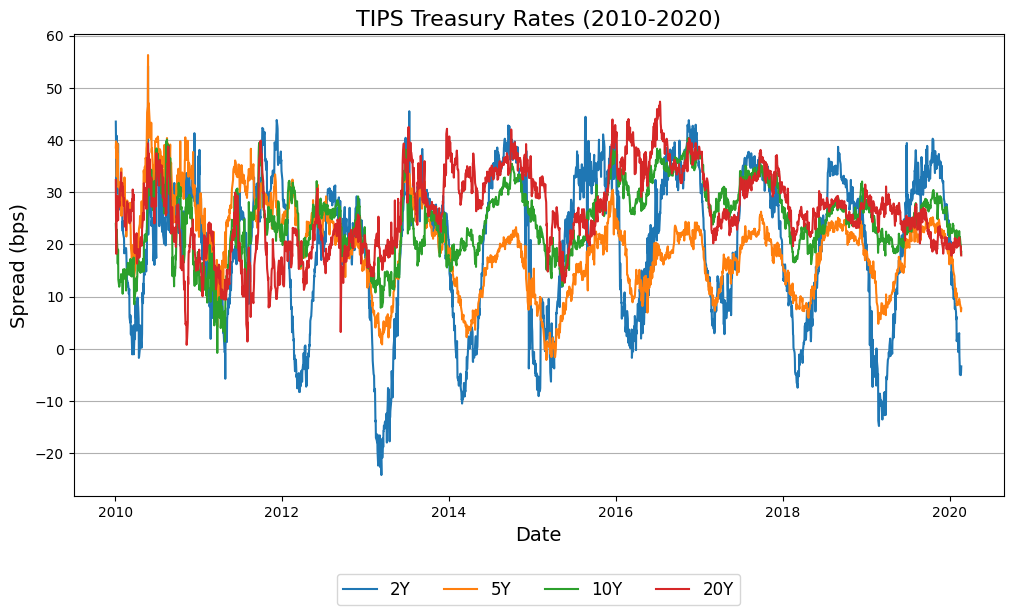

In [4]:
import matplotlib.pyplot as plt

# Create a mapping dictionary for the legend names
legend_name_map = {
    "TIPS_Treasury_02y": "2Y",
    "TIPS_Treasury_05y": "5Y",
    "TIPS_Treasury_10y": "10Y",
    "TIPS_Treasury_20y": "20Y"
}

plt.figure(figsize=(12, 6))
plt.plot(test['2010':'2020-02-20'])
plt.title('TIPS Treasury Rates (2010-2020)', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Spread (bps)', fontsize=14)
plt.grid(True, axis='y')

plt.legend([legend_name_map[col] for col in test.columns], fontsize=12, loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=4)

plt.show()